<a href="https://colab.research.google.com/github/odunola25/MSC-project/blob/work/64_CNN_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***Import Libraries***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

***Define Input shape and other parameters***

In [ ]:
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)
batch_size = 64
num_classes = 3
train_path = '/content/drive/MyDrive/msc/brain_tumour/Training'
test_path = '/content/drive/MyDrive/msc/brain_tumour/Testing'

***Data Augmentation***

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = False,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    shuffle = False,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


***Create CNN Training Function***

In [ ]:
# Create and compile the CNN model
def create_cnn_model(input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # Ensure num_classes is 4
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate = 1e-5),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Specify the number of classes
num_classes = 4

# Create the CNN model
cnn_model = create_cnn_model(input_shape, num_classes)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


***Create CNN Compile Function***

In [ ]:
# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/MSC Project/64_best_cnn_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1)

cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,398,148 (169.37 MB)

 Trainable params: 44,398,148 (169.37 MB)

 Non-trainable params: 0 (0.00 B)

***Train CNN Model***

In [ ]:
# Now, you can train the model
history = cnn_model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=100,
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    verbose=1
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 22s/step - accuracy: 0.2882 - loss: 2.3189 
Epoch 1: val_loss improved from inf to 2.16243, saving model to /content/drive/MyDrive/Colab Notebooks/Odunola Thesis/64_best_cnn_model.keras
90/90 ━━━━━━━━━━━━━━━━━━━━ 2893s 30s/step - accuracy: 0.2883 - loss: 2.3183 - val_accuracy: 0.3806 - val_loss: 2.1624 - learning_rate: 1.0000e-05
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 822ms/step - accuracy: 0.3661 - loss: 2.1405
Epoch 2: val_loss improved from 2.16243 to 2.03744, saving model to /content/drive/MyDrive/Colab Notebooks/Odunola Thesis/64_best_cnn_model.keras
90/90 ━━━━━━━━━━━━━━━━━━━━ 91s 939ms/step - accuracy: 0.3665 - loss: 2.1400 - val_accuracy: 0.4622 - val_loss: 2.0374 - learning_rate: 1.0000e-05
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 831ms/step - accuracy: 0.4526 - loss: 1.9997
Epoch 3: val_loss improved from 2.03744 to 1.92447, saving model to /content/drive/MyDrive/Colab Notebooks/Odunola Thesis/64_best_cnn_model.keras
90/90 ━━━━━━━━━━━━━━━━━━━━

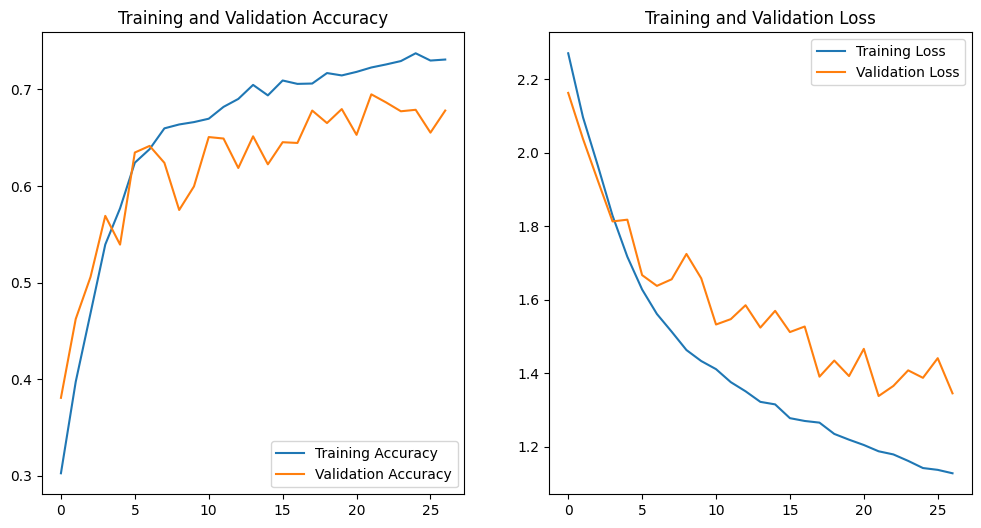

In [ ]:
import matplotlib.pyplot as plt
# Plot the training and validation accuracy and loss curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [ ]:
# Load the best model
best_model_path = '/content/drive/MyDrive/Colab Notebooks/Odunola Thesis/64_best_cnn_model.keras'

cnn_model_64 = tf.keras.models.load_model(best_model_path)

In [ ]:
# Evaluate the best model
test_loss, test_accuracy = cnn_model_64.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy}')

21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 278ms/step - accuracy: 0.5933 - loss: 1.5836
Test Accuracy: 0.6948894262313843


In [ ]:
import os
import glob

def get_number(path):
  if not os.path.exists(path):
    return 0
  count = 0

  for current_path, dirs, files in os.walk(path):
    for dr in dirs:
      count += len(glob.glob(os.path.join(current_path,dr + "/*")))
  return count

In [ ]:
testing_images = get_number(test_path)

print("Number of testing samples is", testing_images)

Number of testing samples is 1311


In [ ]:
Classes = ['Glioma', 'Meningioma', 'No Tumour', 'Pituitary']

from sklearn.metrics import classification_report,confusion_matrix
y_test = test_generator.classes

# predicting our model with test dataset i.e. unseen dataset
pred = cnn_model_64.predict(test_generator, testing_images//batch_size+1,verbose=1,).argmax(axis=1)
#print(y_test)
print(pred)
#Classification report of every label
print(classification_report(y_test, pred, target_names = Classes))

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 578s 29s/step
[2 0 0 ... 3 3 2]
              precision    recall  f1-score   support

      Glioma       0.76      0.63      0.68       300
  Meningioma       0.66      0.22      0.33       306
   No Tumour       0.78      0.92      0.84       405
   Pituitary       0.59      0.94      0.72       300

    accuracy                           0.69      1311
   macro avg       0.70      0.68      0.65      1311
weighted avg       0.70      0.69      0.66      1311



In [ ]:
correct = 0
incorrect = 0
for i in range(len(y_test)):

    #print("Test Sample is: ", y_test[i], "while predicted sample is: ", pred[i])

    if y_test[i] != pred[i]:
        incorrect += 1
    else:
        correct += 1

print('Total number of test cases', ((len(y_test))))
print('Number of correct predictions', correct)
print('Number of incorrect predictions', incorrect)

Total number of test cases 1311
Number of correct predictions 911
Number of incorrect predictions 400


[[188  28  13  71]
 [ 55  68  79 104]
 [  2   7 373  23]
 [  4   0  14 282]]


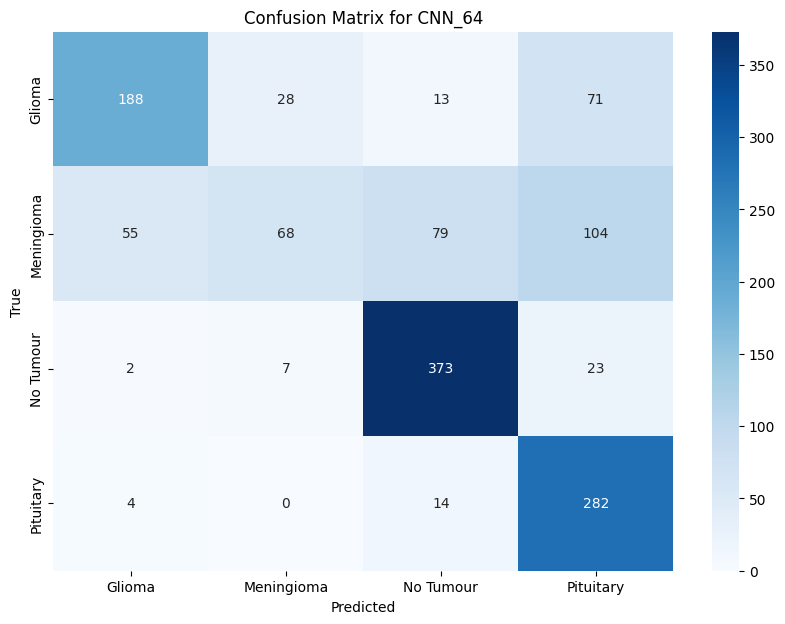

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, pred)
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=Classes, yticklabels=Classes)
plt.title('Confusion Matrix for CNN_64')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()